<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/uas_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Latar Belakang**

#**1. Data Collection**

###**1.1 Import Drive**

In [ ]:
# 1.1 Mount Google Drive (jika menggunakan Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**1.2 Import Library & Dataset**

In [ ]:
# 1.2 Import library yang dibutuhkan
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/DM/salaries.csv"  # Ganti sesuai lokasi file kamu
df = pd.read_csv(file_path)

##**1.3 Cek Awal Data**

In [ ]:
# 1.3 Cek ukuran dan tampilkan 5 baris pertama
print("Jumlah baris & kolom:", df.shape)

Jumlah baris & kolom: (141566, 11)


In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M


##**1.4 Deskripsi Kolom**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141566 entries, 0 to 141565
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           141566 non-null  int64 
 1   experience_level    141566 non-null  object
 2   employment_type     141566 non-null  object
 3   job_title           141566 non-null  object
 4   salary              141566 non-null  int64 
 5   salary_currency     141566 non-null  object
 6   salary_in_usd       141566 non-null  int64 
 7   employee_residence  141566 non-null  object
 8   remote_ratio        141566 non-null  int64 
 9   company_location    141566 non-null  object
 10  company_size        141566 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.9+ MB


#**2. Pre Processing**

##**2.1 Cek Missing Value**

In [ ]:
# Cek missing values
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


##**2.2 Cek Tipe Data Tiap Kolom**

In [ ]:
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


##**2.3 Transformasi**

In [ ]:
# Ubah nama kolom agar seragam
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Cek ulang kolom
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Pastikan kolom salary_in_usd bertipe numerik
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

# Hapus baris yang tidak memiliki nilai salary
df = df.dropna(subset=['salary_in_usd']).reset_index(drop=True)

#**3. EDA**

In [ ]:
!pip install pycountry

In [ ]:
import pycountry

# Fungsi untuk mengubah kode negara jadi nama lengkap
def convert_country(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code  # Kalau gagal, kembalikan kode aslinya

# Tambahkan kolom baru 'country_name'
df['country_name'] = df['company_location'].apply(convert_country)

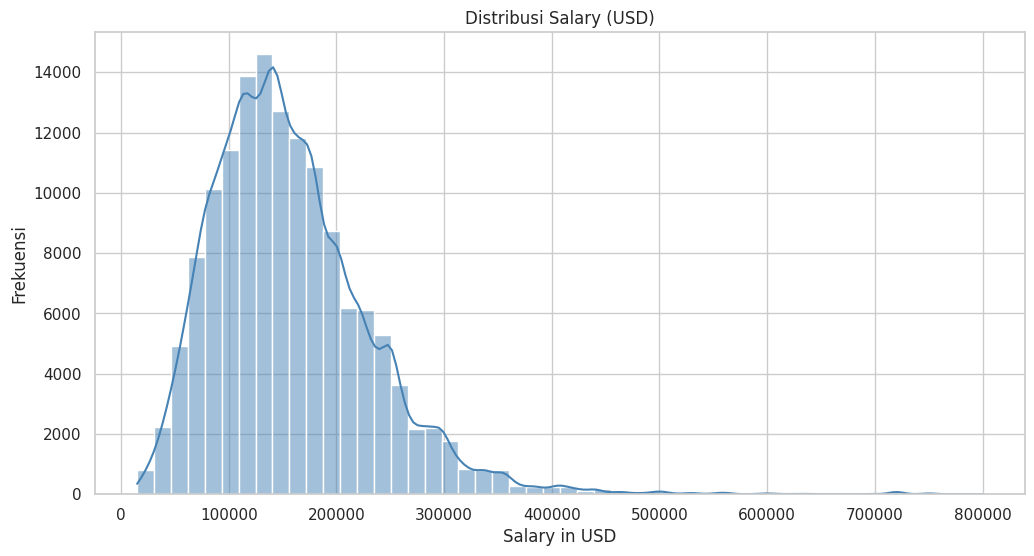

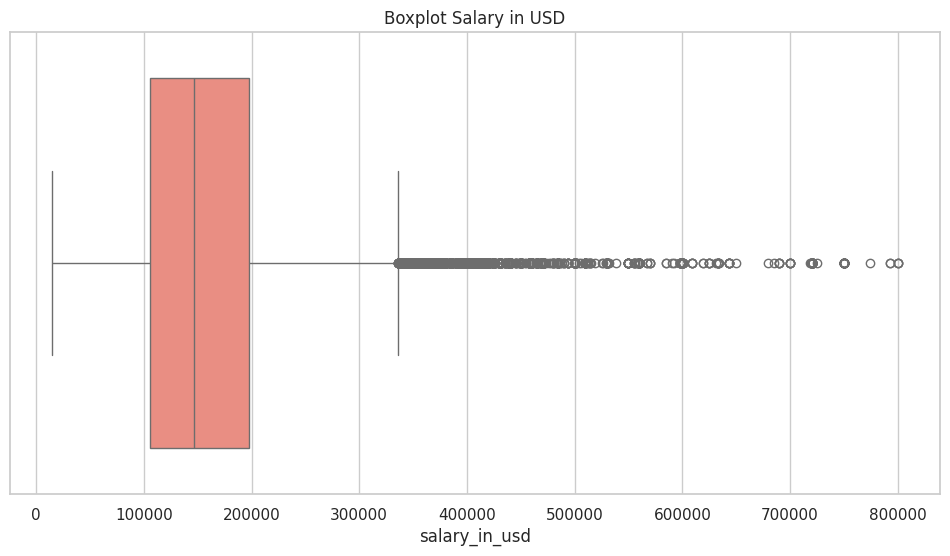

/tmp/ipython-input-15-4091625714.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='exp_label', y='salary_in_usd', palette='Set3', order=['Entry', 'Mid', 'Senior', 'Executive'])


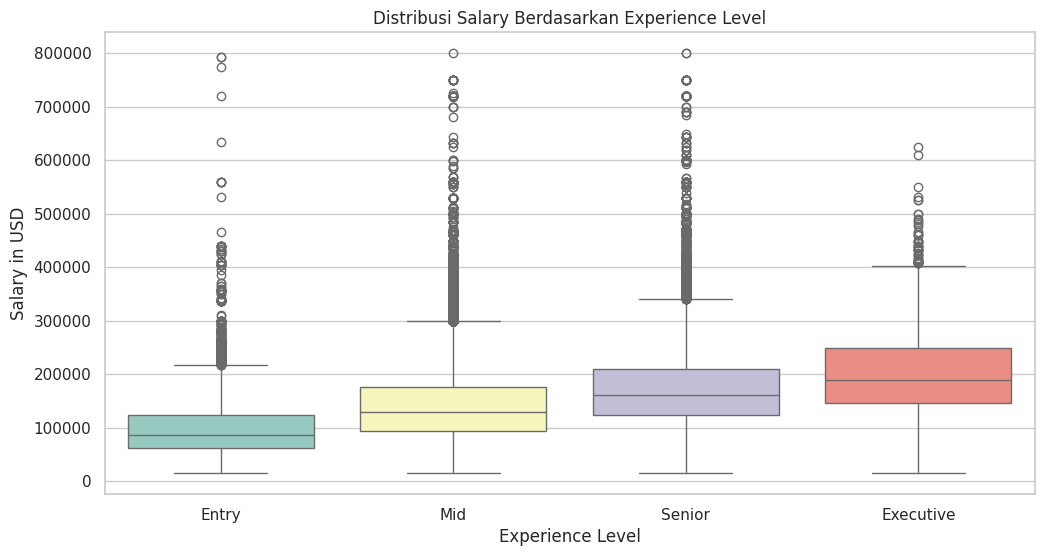

/tmp/ipython-input-15-4091625714.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='company_size_label', y='salary_in_usd', palette='cool')


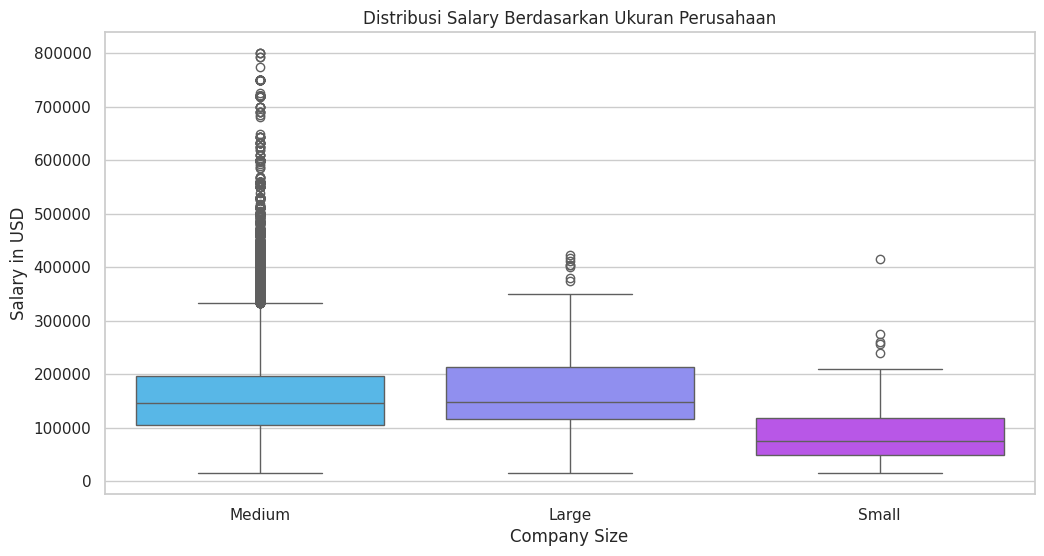

/tmp/ipython-input-15-4091625714.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


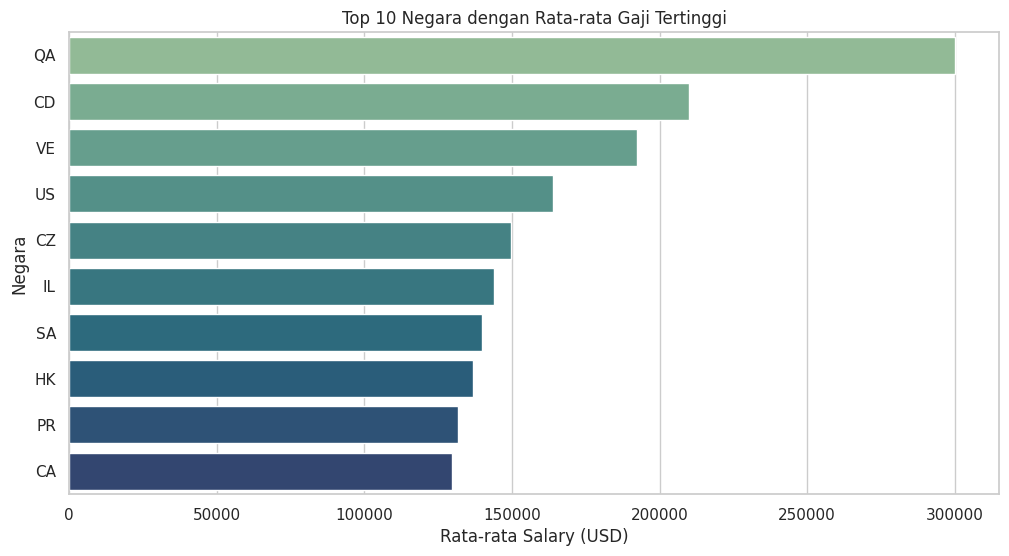

/tmp/ipython-input-15-4091625714.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='remote_label', y='salary_in_usd', palette='Accent')


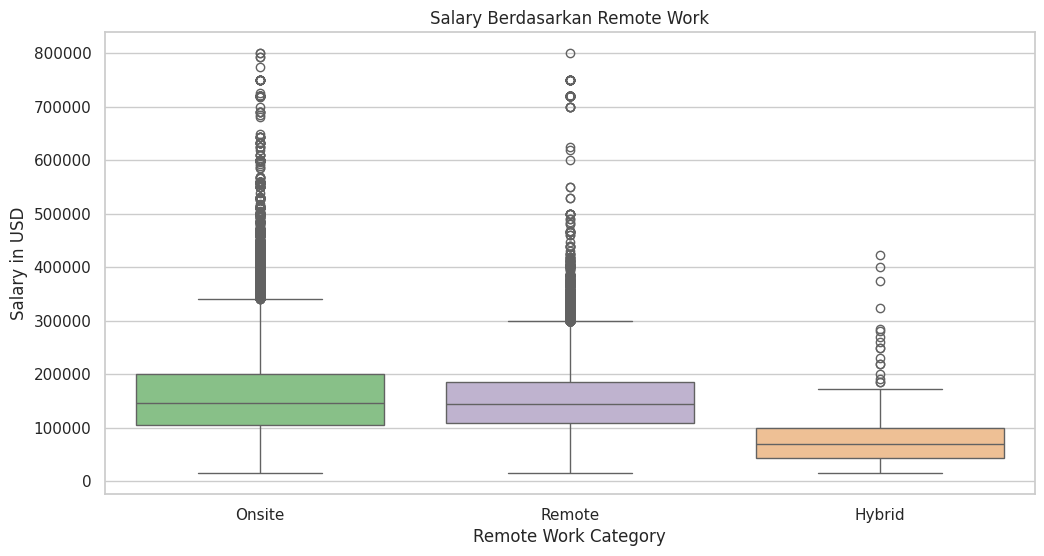

/tmp/ipython-input-15-4091625714.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_jobs_df, x='job_title', y='salary_in_usd', palette='tab10')


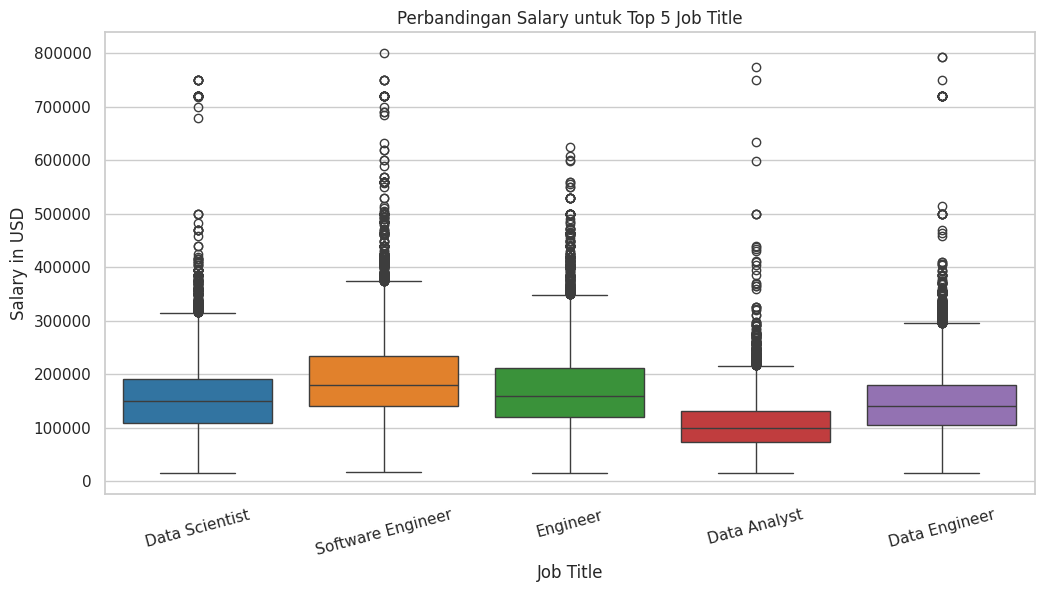

In [ ]:
# --- LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# --- 1. Distribusi Gaji (salary_in_usd)
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='steelblue')
plt.title('Distribusi Salary (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frekuensi')
plt.show()

# --- 2. Deteksi Outlier Gaji
sns.boxplot(x=df['salary_in_usd'], color='salmon')
plt.title('Boxplot Salary in USD')
plt.show()

# --- 3. Salary Berdasarkan Pengalaman
order_exp = ['EN', 'MI', 'SE', 'EX']
label_exp = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
df['exp_label'] = df['experience_level'].map(label_exp)

sns.boxplot(data=df, x='exp_label', y='salary_in_usd', palette='Set3', order=['Entry', 'Mid', 'Senior', 'Executive'])
plt.title('Distribusi Salary Berdasarkan Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

# --- 4. Salary Berdasarkan Ukuran Perusahaan
size_map = {'S': 'Small', 'M': 'Medium', 'L': 'Large'}
df['company_size_label'] = df['company_size'].map(size_map)

sns.boxplot(data=df, x='company_size_label', y='salary_in_usd', palette='cool')
plt.title('Distribusi Salary Berdasarkan Ukuran Perusahaan')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

# --- 5. Top 10 Negara dengan Gaji Tertinggi (Rata-rata)
top_countries = (
    df.groupby('company_location')['salary_in_usd']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Negara dengan Rata-rata Gaji Tertinggi')
plt.xlabel('Rata-rata Salary (USD)')
plt.ylabel('Negara')
plt.show()

# --- 6. Salary vs Remote Ratio
remote_map = {0: 'Onsite', 50: 'Hybrid', 100: 'Remote'}
df['remote_label'] = df['remote_ratio'].map(remote_map)

sns.boxplot(data=df, x='remote_label', y='salary_in_usd', palette='Accent')
plt.title('Salary Berdasarkan Remote Work')
plt.xlabel('Remote Work Category')
plt.ylabel('Salary in USD')
plt.show()

# --- 7. Job Title Populer vs Salary
top_jobs = df['job_title'].value_counts().nlargest(5).index.tolist()
top_jobs_df = df[df['job_title'].isin(top_jobs)]

sns.boxplot(data=top_jobs_df, x='job_title', y='salary_in_usd', palette='tab10')
plt.title('Perbandingan Salary untuk Top 5 Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=15)
plt.show()

#**4. Feature Engineering**

##**4.1 Klasifikasi Gaji: salary_level (Low, Medium, High)**

In [ ]:
# Buat kolom salary_level berdasarkan distribusi kuantil (terbagi 3 bagian sama besar)
df['salary_level'] = pd.qcut(df['salary_in_usd'], q=3, labels=['low', 'medium', 'high'])

# Cek distribusi kategori
print("Distribusi Salary Level:")
print(df['salary_level'].value_counts())

Distribusi Salary Level:
salary_level
low       48635
high      46958
medium    45973
Name: count, dtype: int64


##**4.2 Kombinasi: Pengalaman + Remote Ratio**

In [ ]:
# Mapping untuk experience level
label_exp = {
    'EN': 'Entry-level',
    'MI': 'Mid-level',
    'SE': 'Senior',
    'EX': 'Executive'
}

# Mapping untuk ukuran perusahaan
size_map = {
    'S': 'Small',
    'M': 'Medium',
    'L': 'Large'
}

# Mapping untuk remote ratio
remote_map = {
    0: 'On-site',
    50: 'Hybrid',
    100: 'Remote'
}

In [ ]:
# Pastikan mapping konsisten
df['experience_level'] = df['experience_level'].map(label_exp)
df['company_size'] = df['company_size'].map(size_map)
df['remote_ratio'] = df['remote_ratio'].map(remote_map)

##**4.3 Encoding Kombinasi (exp_remote_enc)**

In [ ]:
# Fitur input (X) dan label target (y)
selected_features = ['experience_level', 'company_size', 'remote_ratio',
                     'employment_type', 'job_title', 'company_location']

X = df[selected_features]
y = df['salary_level']

# Tampilkan sampel data
print(X.head())
print("Target:", y.head())

  experience_level company_size remote_ratio employment_type  \
0      Entry-level       Medium      On-site              FT   
1      Entry-level       Medium      On-site              FT   
2           Senior       Medium      On-site              FT   
3           Senior       Medium      On-site              FT   
4           Senior       Medium      On-site              FT   

              job_title company_location  
0  Data Quality Analyst               GB  
1  Data Quality Analyst               GB  
2     Applied Scientist               US  
3     Applied Scientist               US  
4        Data Scientist               US  
Target: 0     low
1     low
2    high
3    high
4    high
Name: salary_level, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


#**5. Encode & Split**

In [ ]:
# Encode semua fitur kategorikal jadi numerik
df_encoded = pd.get_dummies(df,
                            columns=[
                                'experience_level',
                                'employment_type',
                                'job_title',
                                'employee_residence',
                                'company_location',
                                'company_size'
                            ],
                            drop_first=True)

In [ ]:
# Buang baris duplikat (berdasarkan seluruh fitur)
df_unique = df_encoded.drop_duplicates()

# Split ulang dari data yang sudah unik
X = df_unique.drop('salary_level', axis=1)
y = df_unique['salary_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Cek overlap
overlap = pd.merge(X_train, X_test, how='inner')
print("Jumlah data overlap antara train dan test:", len(overlap))

Jumlah data overlap antara train dan test: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Salin dataset yang telah dipilih
df_model = df.copy()

# Encode selected categorical features
categorical_cols_to_encode = ['job_title', 'company_location', 'employment_type', 'experience_level', 'company_size', 'remote_ratio']

le_dict = {}
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le  # Simpan encoder jika ingin inverse transform nanti

# Drop columns that are not needed for training or are causing errors
columns_to_drop = ['salary_level', 'salary', 'salary_currency', 'employee_residence', 'country_name', 'exp_label', 'company_size_label', 'remote_label']
X = df_model.drop(columns=columns_to_drop)
y = df_model['salary_level']


# Encode target using LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# Split data into train and test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (113252, 8)
Test shape: (28314, 8)


#**6. Model Training**

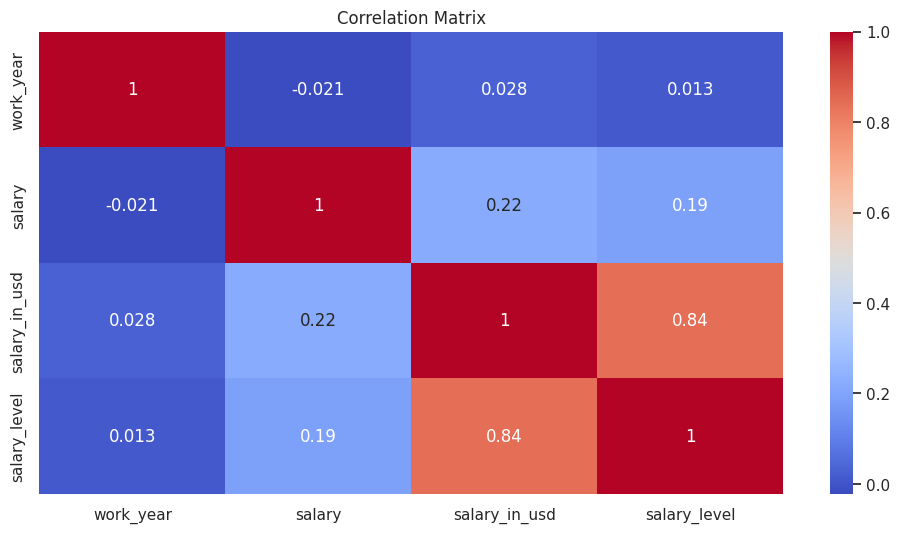

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_unique.copy()

# Drop non-numeric columns that cannot be used for correlation calculation
columns_to_drop_corr = ['salary_currency', 'remote_ratio', 'country_name', 'exp_label', 'company_size_label', 'remote_label']
df_corr = df_corr.drop(columns=columns_to_drop_corr, errors='ignore') # Use errors='ignore' in case some columns were already dropped

df_corr['salary_level'] = df_corr['salary_level'].astype('category').cat.codes  # ubah ke numeric

# Select only numeric columns for correlation calculation
numeric_df_corr = df_corr.select_dtypes(include=np.number)

sns.heatmap(numeric_df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: %.4f ± %.4f" % (scores.mean(), scores.std()))

In [ ]:
# Evaluasi setiap model
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))


Logistic Regression
Accuracy: 0.999293635657272
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00      9392
         low       1.00      1.00      1.00      9727
      medium       1.00      1.00      1.00      9195

    accuracy                           1.00     28314
   macro avg       1.00      1.00      1.00     28314
weighted avg       1.00      1.00      1.00     28314


Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00      9392
         low       1.00      1.00      1.00      9727
      medium       1.00      1.00      1.00      9195

    accuracy                           1.00     28314
   macro avg       1.00      1.00      1.00     28314
weighted avg       1.00      1.00      1.00     28314


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

# Visualisasi confusion matrix Random Forest
best_model = models["Random Forest"]
y_pred_rf = best_model.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf, display_labels=le_target.classes_, cmap="Blues"
)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#**7. Visualisasi**